In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree, export_text
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

In [2]:
dataset_path = 'https://raw.githubusercontent.com/Koldim2001/test_api/refs/heads/main/titanic.csv' 
df = pd.read_csv(dataset_path)

In [3]:
df = df[['Survived', 'Pclass', 'Age', 'Fare']]  # The subset (columns) we selected for this project
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [4]:
df = df.dropna(subset=['Age'])

In [5]:
train, test = train_test_split(df, test_size=0.2)

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Plots confusion matrix
    cm - confusion matrix
    classes - class list
    normalize - normalize to 1 if True
    title - plot title
    cmap - color map
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
def experiment(max_depth, min_samples_split):
    """
    Builds and trains Decision Tree model
    """
    # Build and train Decision Tree model
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    model.fit(train.drop('Survived', axis=1), train['Survived'])

    # Calculate accuracy metrics
    preds = model.predict(test.drop('Survived', axis=1))
    acc = accuracy_score(test['Survived'], preds)
    cm = confusion_matrix(test['Survived'], preds)

    print("accuracy", acc)

    # Plot confusion matrix
    plot_confusion_matrix(cm, classes=['Not Survived', 'Survived'])

    # Classification report
    report = classification_report(test['Survived'], preds, target_names=['Not Survived', 'Survived'])
    print(report)

    # Save model in pickle format
    with open('../outputs/models/model_dt.pkl', 'wb') as f:
        pickle.dump(model, f)

In [8]:
max_depth = 5
min_samples_split = 150

accuracy 0.7342657342657343
Confusion matrix, without normalization
              precision    recall  f1-score   support

Not Survived       0.79      0.77      0.78        87
    Survived       0.66      0.68      0.67        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.74      0.73      0.74       143



FileNotFoundError: [Errno 2] No such file or directory: '../outputs/models/model_dt.pkl'

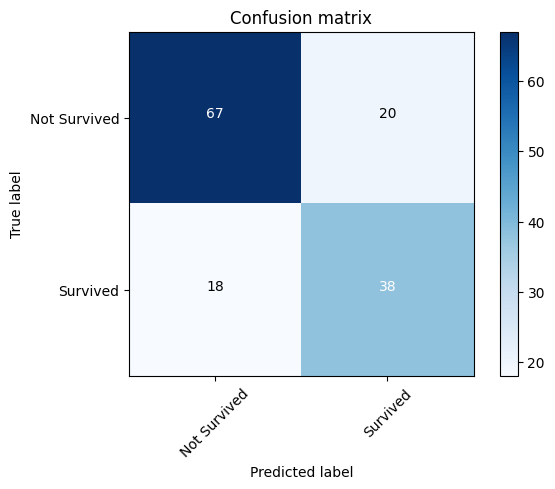

In [10]:
experiment(max_depth, min_samples_split)